In [78]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
     

In [79]:
forbes2000_data_path="URI.csv"
sp500_data_path="XEL.csv"

In [80]:
forbes2000_data = pd.read_csv(forbes2000_data_path)
sp500_data=pd.read_csv(sp500_data_path)
     

In [81]:
forbes2000_data.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,18-12-1997,14.3750,14.5,1905200,16.1250,15.00,15.00
1,19-12-1997,14.6875,15.0,275200,15.6250,15.50,15.50
2,22-12-1997,15.0000,15.5,88300,15.8750,15.00,15.00
3,23-12-1997,15.0000,15.0,74500,15.8125,15.50,15.50
4,24-12-1997,16.0000,16.0,45400,16.2500,16.25,16.25


In [82]:
sp500_data.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,21-02-1973,7.25000,0.0,10000,7.31250,7.25000,1.145464
1,22-02-1973,7.21875,0.0,10000,7.28125,7.25000,1.145464
2,23-02-1973,6.71875,0.0,8800,7.28125,7.21875,1.140526
3,26-02-1973,7.12500,0.0,34000,7.25000,7.12500,1.125714
4,27-02-1973,7.12500,0.0,8400,7.18750,7.12500,1.125714


In [83]:
forbes2000_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6287 non-null   object 
 1   Low             6287 non-null   float64
 2   Open            6287 non-null   float64
 3   Volume          6287 non-null   int64  
 4   High            6287 non-null   float64
 5   Close           6287 non-null   float64
 6   Adjusted Close  6287 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 343.9+ KB


In [84]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12564 entries, 0 to 12563
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            12564 non-null  object 
 1   Low             12564 non-null  float64
 2   Open            12564 non-null  float64
 3   Volume          12564 non-null  int64  
 4   High            12564 non-null  float64
 5   Close           12564 non-null  float64
 6   Adjusted Close  12564 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 687.2+ KB


In [85]:
forbes2000_data.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,6287.000000,6287.000000,6.287000e+03,6287.000000,6287.000000,6287.000000
mean,71.497444,72.733115,1.235988e+06,73.916028,72.718624,72.718624
std,84.425016,85.791556,1.298616e+06,87.100218,85.767227,85.767227
min,2.520000,3.060000,2.900000e+03,3.300000,3.030000,3.030000
25%,18.100000,18.500000,4.791000e+05,18.872500,18.490000,18.490000
50%,30.000000,30.660000,9.393000e+05,31.375000,30.625000,30.625000
75%,103.864998,105.255001,1.580200e+06,107.029999,105.334999,105.334999
max,392.510010,411.359985,3.640930e+07,414.989990,392.790009,392.790009


In [86]:
sp500_data.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,12564.000000,12564.000000,1.256400e+04,12564.000000,12564.000000,12564.000000
mean,22.676611,21.109433,1.249834e+06,23.065751,22.883980,13.635120
std,15.906782,17.963465,1.577493e+06,16.211380,16.067111,17.382236
min,3.812500,0.000000,0.000000e+00,3.937500,3.875000,0.622342
25%,10.656250,0.000000,1.089500e+05,10.900000,10.767500,1.897140
50%,20.062500,20.245000,4.242000e+05,20.400000,20.250000,7.481139
75%,26.802499,27.062500,2.172525e+06,27.312500,27.062500,14.138511
max,76.820000,77.089996,2.484980e+07,77.660004,77.410004,76.906860


In [87]:
#Data visualization and preprocessing 

# Checking the time period covered by each dataset
forbes2000_start_date, forbes2000_end_date = forbes2000_data['Date'].min(), forbes2000_data['Date'].max()
sp500_start_date, sp500_end_date = sp500_data['Date'].min(), sp500_data['Date'].max()

print(f"Forbes2000 data period: {forbes2000_start_date} to {forbes2000_end_date}")
print(f"Sp500 data period: {sp500_start_date} to {sp500_end_date}")

# Checking if the periods match
if forbes2000_start_date == sp500_start_date and forbes2000_end_date == sp500_end_date:
    print("Time periods match.")
else:
    print("Time periods do not match.")

# Checking for matching data points
forbes2000_dates = set(forbes2000_data['Date'])
sp500_dates = set(sp500_data['Date'])

# Dates present in one dataset but not the other
unmatched_dates = forbes2000_dates.symmetric_difference(sp500_dates)
if len(unmatched_dates) == 0:
    print("All dates match in both datasets.")
else:
    print(f"Number of unmatched dates: {len(unmatched_dates)}")

print("Some unmatched dates:", list(unmatched_dates)[:10])  # Print first 10 unmatched dates

Forbes2000 data period: 01-02-1999 to 31-12-2021
Sp500 data period: 01-02-1974 to 31-12-2021
Time periods do not match.
Number of unmatched dates: 6277
Some unmatched dates: ['27-04-1992', '23-12-1974', '07-04-1983', '23-05-1996', '14-08-1978', '14-05-1982', '16-02-1994', '18-09-1989', '07-06-1989', '18-07-1989']


In [88]:
sp500_data = sp500_data[sp500_data['Date'] <= '2024-12-17']
forbes2000_data = forbes2000_data[~forbes2000_data['Date'].isin(unmatched_dates)]
sp500_data = sp500_data[~sp500_data['Date'].isin(unmatched_dates)]

# Verify synchronization
print(f"forbes2000 data period: {forbes2000_data['Date'].min()} to {forbes2000_data['Date'].max()}")
print(f"Sgp500 data period: {sp500_data['Date'].min()} to {sp500_data['Date'].max()}")
print(f"Number of unmatched dates: {len(set(forbes2000_data['Date']).symmetric_difference(set(sp500_data['Date'])))}")

     

forbes2000 data period: 01-02-1999 to 31-12-2021
Sgp500 data period: 01-02-1999 to 20-12-2021
Number of unmatched dates: 2144


In [89]:
#time series plots

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_time_series(df, column, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df[column], label=column)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()

    # Format the x-axis to show fewer and more readable date labels
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gcf().autofmt_xdate()  # Rotate the labels for better readability

    plt.show()




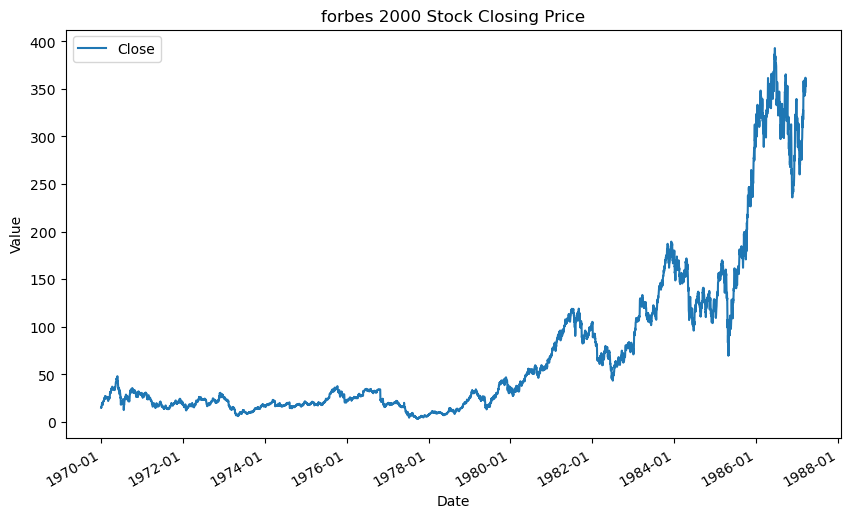

In [90]:
plot_time_series(forbes2000_data, 'Close', 'forbes 2000 Stock Closing Price')


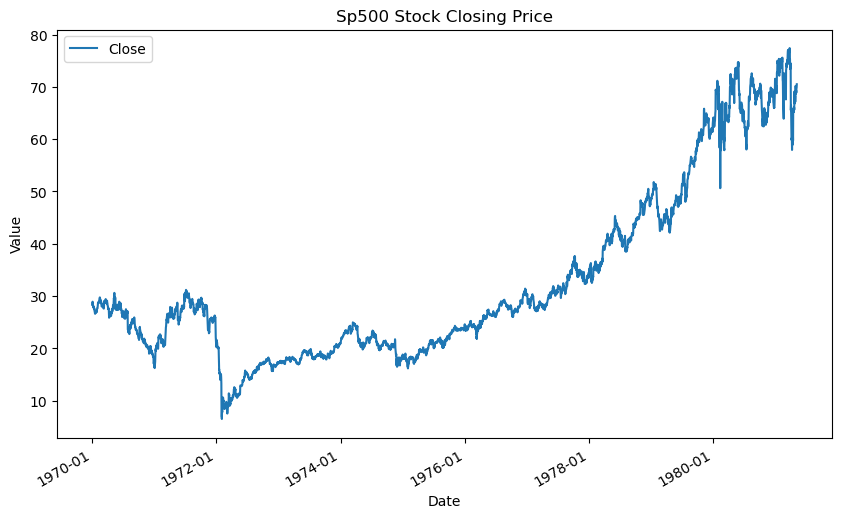

In [91]:
plot_time_series(sp500_data, 'Close', 'Sp500 Stock Closing Price')

In [92]:
def check_stationarity(df, column):
    result = adfuller(df[column].dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")

In [93]:
check_stationarity(forbes2000_data, 'Close')

ADF Statistic: 1.13215010950533
p-value: 0.995481882786047
Series is not stationary


In [94]:
check_stationarity(sp500_data, 'Close')

ADF Statistic: 0.5555474872524951
p-value: 0.9864671301901096
Series is not stationary


In [95]:
# Apply log transformation
forbes2000_data['Log_Close'] = np.log(forbes2000_data['Close'])
sp500_data['Log_Close'] = np.log(sp500_data['Close'])

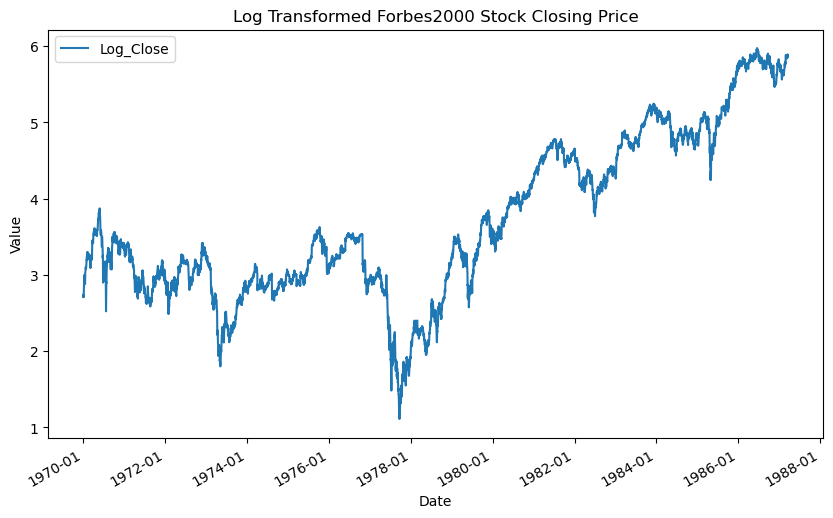

In [96]:
# Visualize the log-transformed data
plot_time_series(forbes2000_data, 'Log_Close', 'Log Transformed Forbes2000 Stock Closing Price')


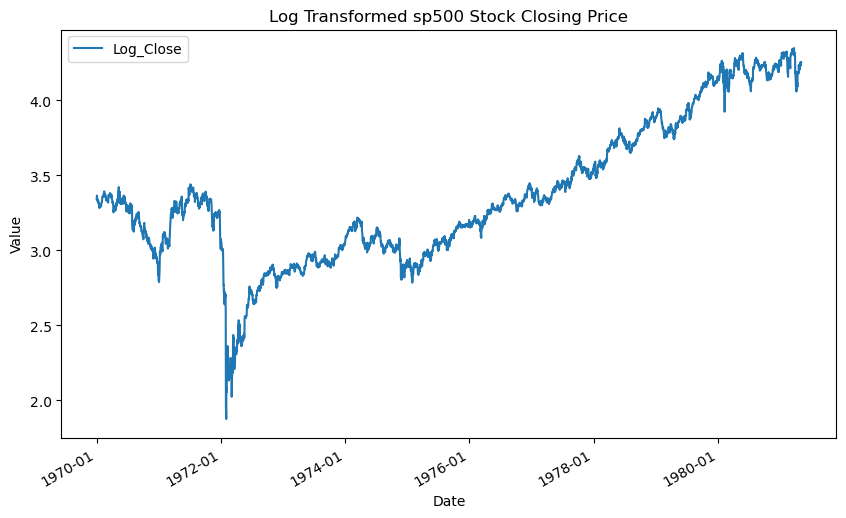

In [97]:
# Visualize the log-transformed data
plot_time_series(sp500_data, 'Log_Close', 'Log Transformed sp500 Stock Closing Price')

     


In [98]:
# Check stationarity again

check_stationarity(forbes2000_data, 'Log_Close')
check_stationarity(sp500_data, 'Log_Close')


ADF Statistic: -0.6787309125082657
p-value: 0.8521820637805266
Series is not stationary
ADF Statistic: -0.5170742300544602
p-value: 0.8886412878038337
Series is not stationary


In [99]:
corr_matrix_forbes = forbes2000_data.drop(columns=['Date']).corr()


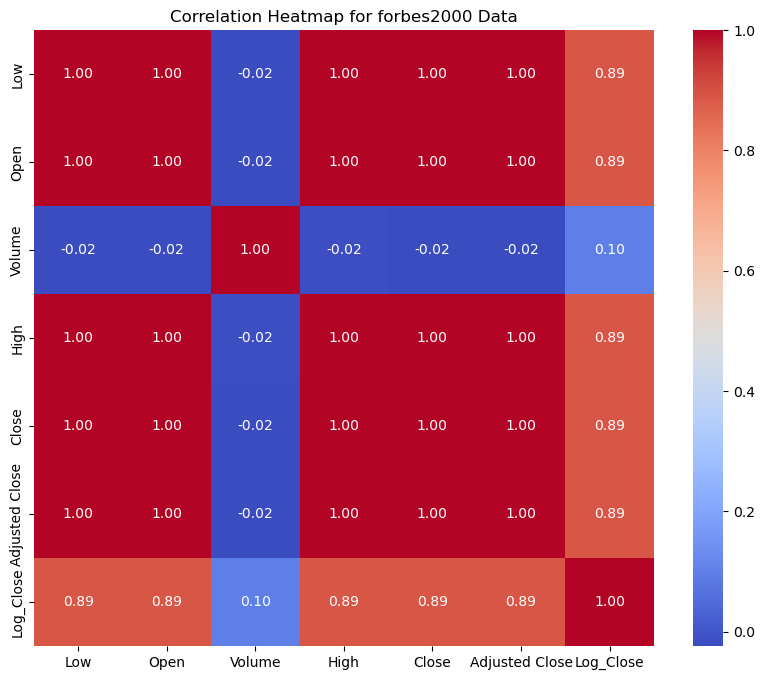

In [100]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_forbes, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for forbes2000 Data')
plt.show()

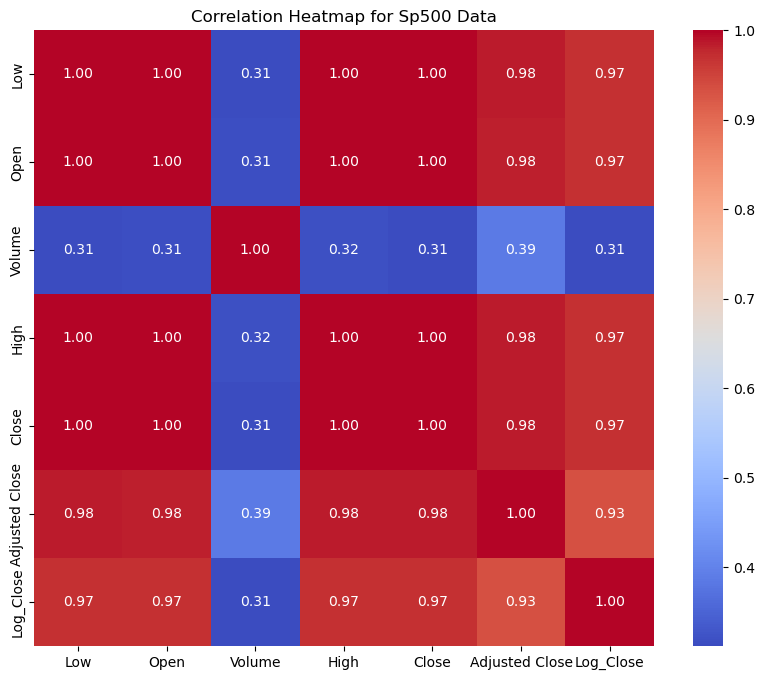

In [101]:

corr_matrix_sp = sp500_data.drop(columns=['Date']).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_sp, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Sp500 Data')
plt.show()
     

In [ ]:
# Normalization using Min-Max Scaler
scaler = MinMaxScaler()


features_to_scale = ['Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume']


forbes2000_data[features_to_scale] = scaler.fit_transform(forbes2000_data[features_to_scale])
sp500_data[features_to_scale] = scaler.fit_transform(sp500_data[features_to_scale])

     

#splitting the data into train , validation and test sets.

In [103]:
# Function to split data into train, validation, and test sets
def split_data(df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    total_rows = len(df)
    train_end = int(total_rows * train_ratio)
    val_end = int(total_rows * (train_ratio + val_ratio))

    train_data = df[:train_end]
    val_data = df[train_end:val_end]
    test_data = df[val_end:]

    return train_data, val_data, test_data

# Splitting the forbes2000 data
forbes2000_train, forbes2000_val, forbes2000_test = split_data(forbes2000_data)

# Splitting the Sp500 data
sp500_train, sp500_val, sp500_test = split_data(sp500_data)

# Print shapes as a sanity check
print("forbes2000 - Train:", forbes2000_train.shape, "Validation:", forbes2000_val.shape, "Test:", forbes2000_test.shape)
print("Sp500 - Train:", sp500_train.shape, "Validation:", sp500_val.shape, "Test:", sp500_test.shape)


Apple - Train: (4400, 8) Validation: (943, 8) Test: (944, 8)
Samsung - Train: (2900, 8) Validation: (621, 8) Test: (622, 8)


In [104]:
def create_sequences(data, sequence_length, feature_index):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:(i + sequence_length), feature_index].values)
        y.append(data.iloc[i + sequence_length, feature_index])
    return np.array(X), np.array(y)

sequence_length = 30  # Number of time steps in each sequence
close_price_index = 3  # Index of 'Close' column

# Prepare sequences for each dataset
X_forbes2000_train, y_forbes2000_train = create_sequences(forbes2000_train, sequence_length, close_price_index)
X_forbes2000_val, y_forbes2000_val = create_sequences(forbes2000_val, sequence_length, close_price_index)
X_forbes2000_test, y_forbes2000_test = create_sequences(forbes2000_test, sequence_length, close_price_index)

X_sp500_train, y_sp500_train = create_sequences(sp500_train, sequence_length, close_price_index)
X_sp500_val, y_sp500_val = create_sequences(sp500_val, sequence_length, close_price_index)
X_sp500_test, y_sp500_test = create_sequences(sp500_test, sequence_length, close_price_index)

# Reshape the data for RNN input
X_forbes2000_train = X_forbes2000_train.reshape((X_forbes2000_train.shape[0], sequence_length, 1))
X_forbes2000_val = X_forbes2000_val.reshape((X_forbes2000_val.shape[0], sequence_length, 1))
X_forbes2000_test = X_forbes2000_test.reshape((X_forbes2000_test.shape[0], sequence_length, 1))

X_sp500_train = X_sp500_train.reshape((X_sp500_train.shape[0], sequence_length, 1))
X_sp500_val = X_sp500_val.reshape((X_sp500_val.shape[0], sequence_length, 1))
X_sp500_test = X_sp500_test.reshape((X_sp500_test.shape[0], sequence_length, 1))


#baseline rnn model

In [105]:
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='relu', input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    model.summary()
    return model

forbes2000_rnn_model = build_rnn_model((sequence_length, 1))
sp500_rnn_model = build_rnn_model((sequence_length, 1))

C:\Users\ruzar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

#Baseline model history of forbes Data

In [106]:
# Train the forbes2000 RNN model
forbes_history = forbes2000_rnn_model.fit(X_forbes2000_train, y_forbes2000_train, epochs=20, batch_size=32,
                                    validation_data=(X_forbes2000_val, y_forbes2000_val))
    

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 5.4671e-04 - val_mse: 5.4671e-04
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.0525e-04 - mse: 8.0525e-04 - val_loss: 4.9414e-04 - val_mse: 4.9414e-04
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.5942e-04 - mse: 9.5942e-04 - val_loss: 5.1713e-04 - val_mse: 5.1713e-04
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.9653e-04 - mse: 8.9653e-04 - val_loss: 5.3114e-04 - val_mse: 5.3114e-04
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 4.9006e-04 - val_mse: 4.9006e-04
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7233e-04 - mse: 7.7233e-04 - val_loss: 4.8136e-04 - val_mse: 4.8136e-04
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.4392e-04 - mse: 7.4392e-04 - val_loss: 4.8839e-04 - val_mse: 4.8839e-04
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.2198e-04 - mse:

In [ ]:
#Baseline model history of sp500 Data

In [107]:
sp500_history = sp500_rnn_model.fit(X_sp500_train, y_sp500_train, epochs=20, batch_size=32,
                                        validation_data=(X_sp500_val, y_sp500_val))

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mse:

###Improving the Baseline model by adding batch normalization and dropout layers

In [108]:


def buid_rnn_model_2(input_shape):
    model = Sequential()

    # First RNN layer with Batch Normalization
    model.add(SimpleRNN(units=50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())

    # Second RNN layer
    model.add(SimpleRNN(units=50, activation='relu'))
    model.add(BatchNormalization())

    # Dropout layer for regularization
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    model.summary()

    return model

     


In [109]:
forbes2000_rnn_model_2 = build_rnn_model_2((sequence_length, 1))


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)             │ (None, 30, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 30, 50)              │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,101 (31.64 KB)

 Trainable params: 7,901 (30.86 KB)

 Non-trainable params: 200 (800.00 B)

In [110]:
sp500_rnn_model_2 = build_rnn_model_2((sequence_length, 1))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)            │ (None, 30, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 30, 50)              │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_11 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,101 (31.64 KB)

 Trainable params: 7,901 (30.86 KB)

 Non-trainable params: 200 (800.00 B)

In [111]:
# Train the forbes2000 RNN model
forbes2000_history_2 = forbes2000_rnn_model_2.fit(X_forbes2000_train, y_forbes2000_train, epochs=20, batch_size=32,
                                    validation_data=(X_forbes2000_val, y_forbes2000_val))

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - loss: 1.5835 - mse: 1.5835 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2973 - mse: 0.2973 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1236 - mse: 0.1236 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 7.2081e-04 - val_mse: 7.2081e-04
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 7.0494e-04 - val_mse: 7.0494e-04
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.9328e-04 - val_mse: 6.9328e-04
Epoch 9/20
137/137 ━━━━

In [112]:
sp500_history_2 = sp500_rnn_model_2.fit(X_sp500_train, y_sp500_train, epochs=20, batch_size=32,
                                        validation_data=(X_sp500_val, y_sp500_val))
     

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 2.7413 - mse: 2.7413 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.3498 - mse: 1.3498 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6759 - mse: 0.6759 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.4175 - mse: 0.4175 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2939 - mse: 0.2939 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1593 - mse: 0.1593 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1033 - mse: 0.1033 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0708 - mse: 0.0708 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.04

In [ ]:
#bulding lstm model

In [113]:
def build_lstm_model(input_shape):
    model = Sequential()

    # First LSTM layer with Batch Normalization
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())

    # Second LSTM layer
    model.add(LSTM(units=50, return_sequences=False))
    model.add(BatchNormalization())

    # Dropout layer for regularization
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    model.summary()

    return model


In [114]:
# Building the Model
# Define the number of features
number_of_features = 1  # Only the 'Close' price is being used as a feature

# Build the LSTM model
forbes2000_lstm_model = build_lstm_model((sequence_length, number_of_features))




Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 30, 50)              │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 200 (800.00 B)

In [115]:
sp500_lstm_model = build_lstm_model((sequence_length, number_of_features))
     

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 30, 50)              │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 200 (800.00 B)

In [116]:
# Train the forbes2000 LSTM model
forbes2000_lstm_history = forbes2000_lstm_model.fit(
    X_forbes2000_train, y_forbes2000_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_forbes2000_val, y_forbes2000_val)
)


Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - loss: 0.8209 - mse: 0.8209 - val_loss: 8.8053e-04 - val_mse: 8.8053e-04
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.4760e-04 - val_mse: 6.4760e-04
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 5.7289e-04 - val_mse: 5.7289e-04
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.1100 - val_mse: 0.1100
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 9/20
137/137 ━━━

In [117]:
# Train the Sp500 LSTM model
sp500_lstm_history = sp500_lstm_model.fit(
    X_sp500_train, y_sp500_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_sp500_val, y_sp500_val)
)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - loss: 0.8540 - mse: 0.8540 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0948 - mse: 0.0948 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.00

In [ ]:
#building GRU model

In [118]:
def build_gru_model(input_shape):
    model = Sequential()

    # First GRU layer with Batch Normalization
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())

    # Second GRU layer
    model.add(GRU(units=50, return_sequences=False))
    model.add(BatchNormalization())

    # Dropout layer for regularization
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

    model.summary()

    return model

In [119]:
# Building the model for forbes2000
forbes2000_gru_model = build_gru_model((sequence_length, number_of_features))

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 30, 50)              │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,701 (92.58 KB)

 Trainable params: 23,501 (91.80 KB)

 Non-trainable params: 200 (800.00 B)

In [120]:
# Building the model for Sp500
sp500_gru_model = build_gru_model((sequence_length, number_of_features))
     

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 30, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 30, 50)              │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,701 (92.58 KB)

 Trainable params: 23,501 (91.80 KB)

 Non-trainable params: 200 (800.00 B)

In [121]:
# Train the forbes2000 GRU model
forbes2000_gru_history = forbes2000_gru_model.fit(
    X_forbes2000_train, y_forbes2000_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_forbes2000_val, y_forbes2000_val)
)


Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 0.8294 - mse: 0.8294 - val_loss: 8.0498e-04 - val_mse: 8.0498e-04
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2706 - mse: 0.2706 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.1473 - val_mse: 0.1473
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.3376 - val_mse: 0.3376
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 2.3617 - val_mse: 2.3617
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 2.3123 - val_mse: 2.3123
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 1.7975 - val_mse: 1.7975
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━

In [122]:
# Train the Sp500 GRU model
sp500_gru_history = sp500_gru_model.fit(
    X_sp500_train, y_sp500_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_sp500_val, y_sp500_val)
)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - loss: 1.4183 - mse: 1.4183 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.8759 - mse: 0.8759 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4449 - mse: 0.4449 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3658 - mse: 0.3658 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0942 - mse: 0.0942 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0442 - mse: 0.0442 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.01

In [123]:
#Evaluating the best model on Test Set

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred_sp500 = sp500_rnn_model.predict(X_sp500_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_sp500_test, y_pred_sp500)
print("Mean Squared Error on Test Data:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_sp500_test, y_pred_sp500)
print("Mean Absolute Error on Test Data:", mae)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Mean Squared Error on Test Data: 0.003377642247956402
Mean Absolute Error on Test Data: 0.037036903610564914


In [124]:
# Make predictions on the test set
y_pred = forbes2000_rnn_model.predict(X_forbes2000_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_forbes2000_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_forbes2000_test, y_pred)
print("Mean Absolute Error on Test Data:", mae)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Mean Squared Error on Test Data: 0.00012086716200992028
Mean Absolute Error on Test Data: 0.00769993778033569


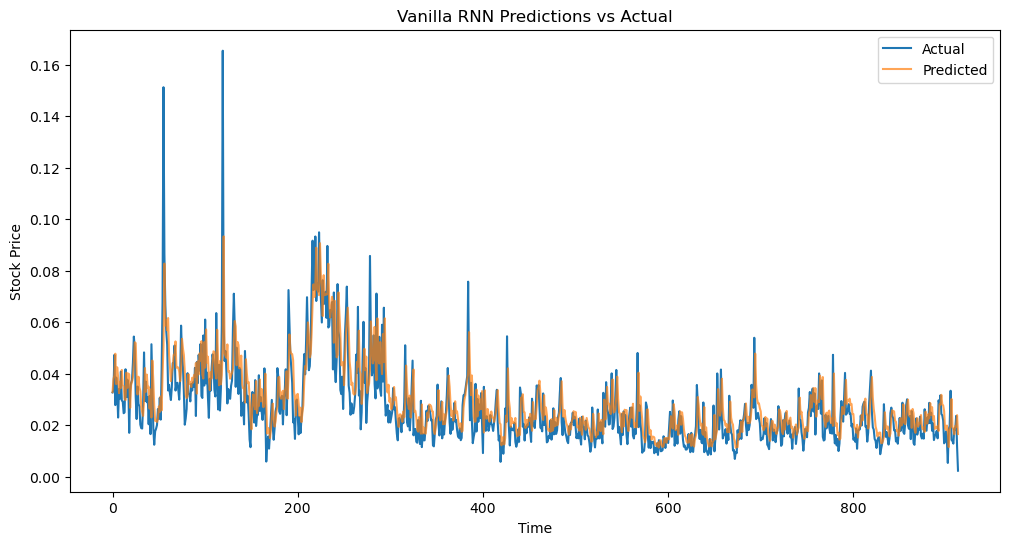

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(y_forbes2000_test, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Vanilla RNN Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
     

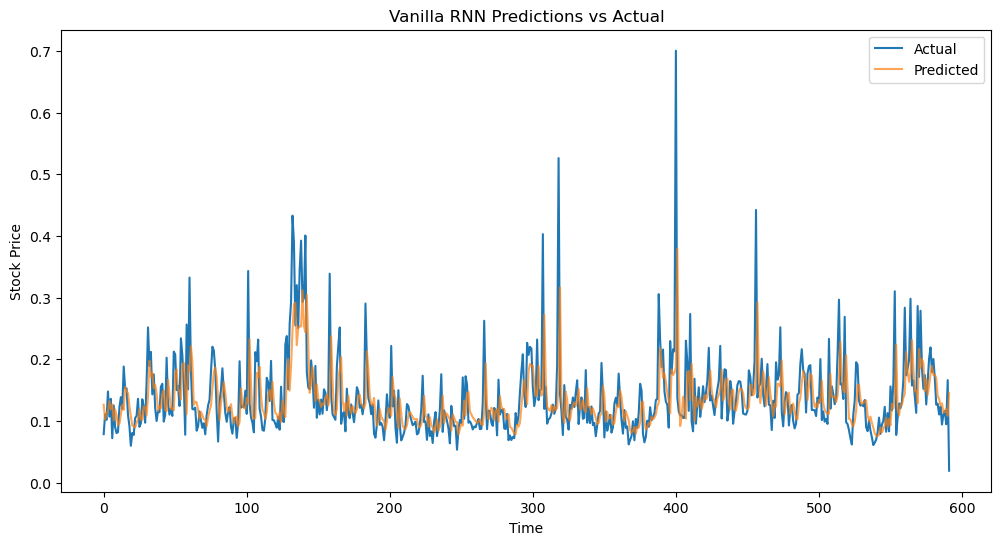

In [126]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_sp500_test, label='Actual')
plt.plot(y_pred_sp500, label='Predicted', alpha=0.7)
plt.title('Vanilla RNN Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
